### Постановка задачи

Проект посвящен крупнейшей в мире компании по предоставлению услуг такси Uber Inc. В этом проекте мы пытаемся спрогнозировать стоимость проезда в будущих транзакциях. Uber ежедневно предоставляет услуги десяткам тысяч клиентов. Теперь очень важно правильно управлять их данными, чтобы предлагать новые бизнес-идеи и добиваться наилучших результатов. В конечном итоге становится очень важно точно оценивать стоимость проезда.

### Стадии решения задачи

- подключение модулей 
- загрузка данных
- разведочный анализ данных
- предварительная обработка данных
- обучение моделей
- настройка гиперпараметров
- вывод

### Подключение модулей

Модули для работы с данными и визуализации

In [6]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
from geopy.distance import geodesic
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Модуль для преобразования категориальных данных

In [7]:
from sklearn.preprocessing import LabelEncoder

### Загрузка данных

In [9]:
df = pd.read_csv('uber.csv')

In [10]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Описание данных  
  

- fare_amount - стоимость каждой поездки в долларах США

- pickup_datetime - дата и время включения счетчика

- Passenger_count - количество пассажиров в транспортном средстве (значение, введенное водителем)

- pickup_longitude - долгота, на которой был включен счетчик

- pickup_latitude - широта, на которой был включен счетчик

- dropoff_longitude - долгота, на которой был отключен счетчик

- dropoff_latitude - широта, на которой был отключен счетчик

  
Целевая переменная:  
- fare_amount - стоимость каждой поездки в долларах США

### Предобработка данных

Удаляем столбцы Unnadem: 0 и key, т.к. они здесь не нужны

In [11]:
del df['Unnamed: 0']
del df['key']

In [12]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Посмотрим на информацию о датасете

In [13]:
df.shape

(200000, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [15]:
df.describe(include='all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
unique,NaN,196629,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-04-13 18:19:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,11.359955,NaN,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,NaN,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,NaN,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,NaN,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,NaN,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,NaN,-73.967154,40.767158,-73.963658,40.768001,2.000000


В датасете 200 000 записей и 7 признаков: 5 признаков типа float64, 1 типа object и 1 типа int64  

- Средняя цена поездки - 11.4$  
- Среднее количество пассажиров - 1.7

Сразу заметны выбросы в виде неверных координат  
Минимальная цена поездки отрицательна, что, по сути, быть не может  
Есть 2 пропущенных значений

Удалим пропущенные значения, т.к. их мало

In [16]:
df.dropna(inplace=True)

Проверяем

In [17]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Посмотрим, есть ли дубликаты

In [18]:
df.duplicated().sum()

0

Дубликатов нет

Так как ранее были замечены аномальные значения координат, поработаем над ними

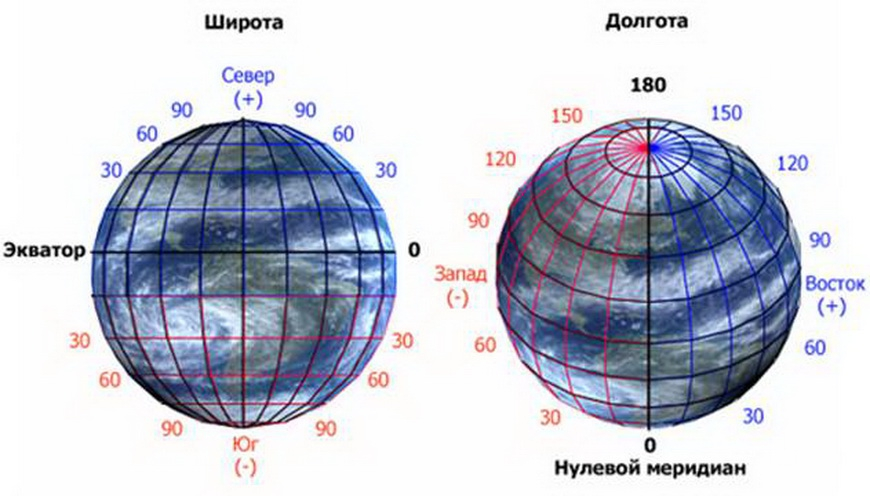

- Значения широты - диапазон от -90 до 90  
- Значения долготы - диапазон от 180 до 180
  
Удалим записи, где координаты не входят в диапазон допустимых значений

In [19]:
for column in ['pickup_latitude', 'dropoff_latitude']:
    df.drop((df[(df[column] > 90) | (df[column] < -90)]).index, inplace=True)

for column in ['pickup_longitude',  'dropoff_longitude']:
    df.drop((df[(df[column] > 180) | (df[column] < -180)]).index, inplace=True)

df.reset_index(drop=True, inplace=True)

Удалим также значения, которые с логической точки зрения, существовать не могут

In [20]:
df.drop((df[(df['pickup_longitude'] == 0) | (df['pickup_latitude'] == 0)]).index, inplace=True)
df.drop((df[(df['dropoff_longitude'] == 0) | (df['dropoff_latitude'] == 0)]).index, inplace=True)

df.reset_index(drop=True, inplace=True)

Напишем функцию, которая вычисляет по координатам расстояние между точками посадки и высадки клиента

In [15]:
def calculate_distance(row):
    start = (row['pickup_latitude'], row['pickup_longitude'])
    end = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(start, end).km

С её помощью создадим новый столбец с дистанцией

In [16]:
df['distance'] = df.apply(calculate_distance, axis=1)

Смотрим на результат

In [17]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.681111
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.454363
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.039603
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661442
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.483730


Выведем для этого признака описательную статистику

In [18]:
df['distance'].describe()

count    196019.000000
mean          4.473622
std          79.072006
min           0.000000
25%           1.255969
50%           2.157236
75%           3.909307
max        8668.029518
Name: distance, dtype: float64

В галаза сразу бросаются максимальное и минимальное значения:  
  
- максимальная дальность поездки - 8668 км  
- минимальная дальность поездки - 0 км  

О средней пока судить не стоит, т.к. данные скорее всего искажены

In [19]:
df[df['distance'] == 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
5,4.90,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1,0.0
46,56.80,2013-01-03 22:24:41 UTC,-73.993498,40.764686,-73.993498,40.764686,1,0.0
81,49.57,2009-08-07 10:43:07 UTC,-73.975058,40.788820,-73.975058,40.788820,1,0.0
160,4.50,2014-01-22 21:01:18 UTC,-73.992937,40.757780,-73.992937,40.757780,1,0.0
352,10.10,2009-08-24 17:25:00 UTC,-73.928705,40.753475,-73.928705,40.753475,1,0.0
...,...,...,...,...,...,...,...,...
195480,5.70,2010-07-24 21:16:00 UTC,-73.924907,40.745833,-73.924907,40.745833,3,0.0
195643,4.50,2013-02-17 11:27:00 UTC,-73.969717,40.765832,-73.969717,40.765832,3,0.0
195675,2.50,2009-06-07 02:07:26 UTC,-73.956623,40.771633,-73.956623,40.771633,1,0.0
195938,4.50,2013-06-24 22:17:43 UTC,-73.793768,40.656939,-73.793768,40.656939,1,0.0


Удалим эти значения из датасета

In [20]:
df.drop((df[df['distance'] == 0]).index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
df[df['distance'] == 0].shape[0]

0

Построим карты и отобразим те точки по координатам, откуда забирали клиентов и где высаживали

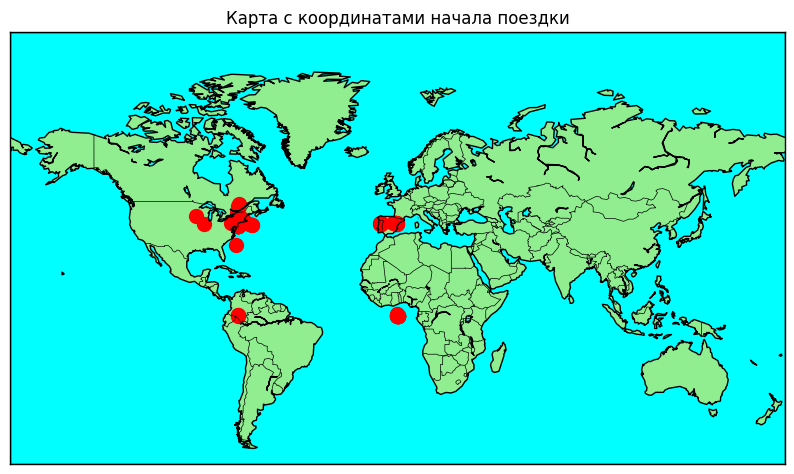

In [22]:
# Создаем фигуру и ось
plt.figure(figsize=(10, 7))

# Создаем объект Basemap с подходящей проекцией
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Добавляем контуры суши и моря
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgreen', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Переводим координаты в проекционные координаты
x_pickup, y_pickup = m(df['pickup_longitude'], df['pickup_latitude'])
x_dropoff, y_dropoff = m(df['dropoff_longitude'], df['dropoff_latitude'])

# Отображаем точки на карте
m.scatter(x_pickup, y_pickup, marker='o', color='red', s=100)

# Отображаем график
plt.title('Карта с координатами начала поездки')
plt.show()

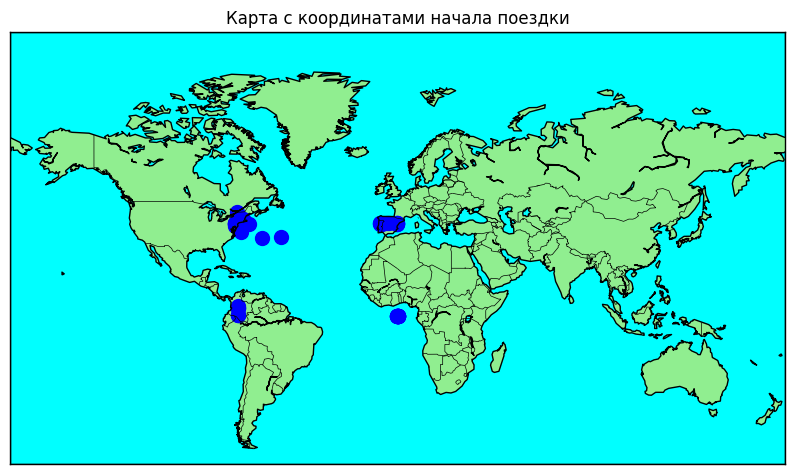

In [23]:
# Создаем фигуру и ось
plt.figure(figsize=(10, 7))

# Создаем объект Basemap с подходящей проекцией
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgreen', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Отображаем точки на карте
m.scatter(x_dropoff, y_dropoff, marker='o', color='blue', s=100)

# Отображаем график
plt.title('Карта с координатами конца поездки')
plt.show()

Видим, что есть точки как и на суше, так и на воде, что странно

Прочитав в интернете информацию о том, что в датасете скорее всего представлены поездки преимущественно в Нью-Йорке, и узнав примерные границы города по координатам, посмотрим, сколько поездок было за пределами Нью-Йорка

In [24]:
df[(df['pickup_longitude'] < -74.2591)]
#   (df['pickup_latitude'] > 45.0059) | (df['pickup_latitude'] < 40.7128)]
#  | (df['pickup_longitude'] > -73.7004)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
4557,12.90,2011-03-30 16:12:21 UTC,-75.342904,40.646965,-75.350437,40.686877,1,4.477715
10987,113.00,2013-12-06 02:17:00 UTC,-74.468770,40.476630,-74.468772,40.476630,2,0.000170
20084,6.50,2009-01-01 12:49:05 UTC,-74.689571,45.031653,-74.689603,45.031598,1,0.006612
24035,27.30,2011-02-17 18:30:35 UTC,-75.426904,40.774075,-73.971779,39.622013,1,178.082364
27162,11.70,2011-05-20 00:05:00 UTC,-74.271207,40.728365,-74.299372,40.726675,1,2.386789
29920,7.70,2010-05-26 17:20:00 UTC,-74.378145,40.707508,-74.375383,40.713863,1,0.743305
39697,8.10,2009-07-30 19:51:48 UTC,-93.824668,43.486656,-54.294363,35.174169,1,3495.406518
52382,171.35,2014-01-08 01:09:06 UTC,-74.291586,40.768783,-74.291589,40.768786,1,0.000418
60917,100.00,2010-11-24 02:14:00 UTC,-74.403080,40.694958,-74.403087,40.694958,1,0.000592
65508,15.30,2010-10-27 08:45:00 UTC,-74.498065,40.492457,-74.521343,40.489118,1,2.008022


Видим, что есть довольно много поездок за пределами города и вблизи него

In [25]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,193974.000000,193974.000000,193974.000000,193974.000000,193974.000000,193974.000000,193974.000000
mean,11.345504,-73.905305,40.687735,-73.904759,40.687138,1.685009,4.520786
std,9.735804,2.756471,2.635159,2.746906,2.640588,1.388580,79.486388
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000084
25%,6.000000,-73.992279,40.736435,-73.991600,40.735300,1.000000,1.280516
50%,8.500000,-73.982127,40.753292,-73.980564,40.753733,1.000000,2.180421
75%,12.500000,-73.968449,40.767533,-73.965501,40.768326,2.000000,3.940650
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,8668.029518


In [26]:
df.shape[0]

193974

In [27]:
for column in ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']:
    q_low = df[column].quantile(0.001)
    q_hi  = df[column].quantile(0.999)

    df.drop((df[(df[column] > q_hi) | (df[column] < q_low)]).index, axis=0, inplace=True)
    df.reset_index(drop=True, inplace=True)

In [28]:
df.shape[0]

192424

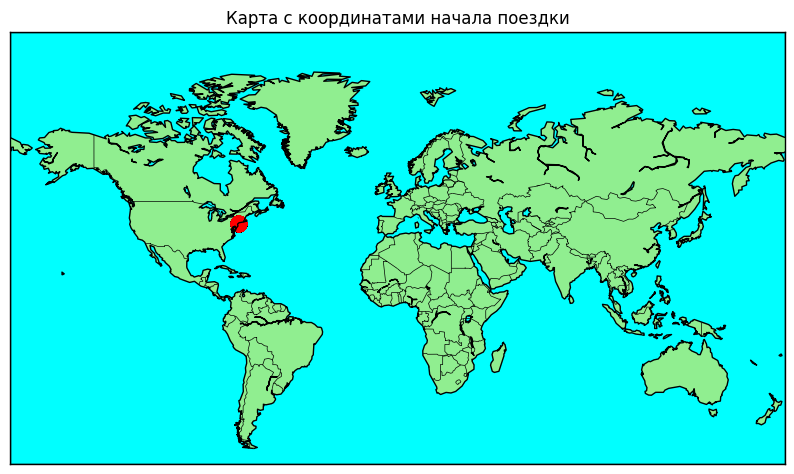

In [29]:
# Создаем фигуру и ось
plt.figure(figsize=(10, 7))

# Создаем объект Basemap с подходящей проекцией
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Добавляем контуры суши и моря
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgreen', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Переводим координаты в проекционные координаты
x_pickup, y_pickup = m(df['pickup_longitude'], df['pickup_latitude'])
x_dropoff, y_dropoff = m(df['dropoff_longitude'], df['dropoff_latitude'])

# Отображаем точки на карте
m.scatter(x_pickup, y_pickup, marker='o', color='red', s=100)

# Отображаем график
plt.title('Карта с координатами начала поездки')
plt.show()

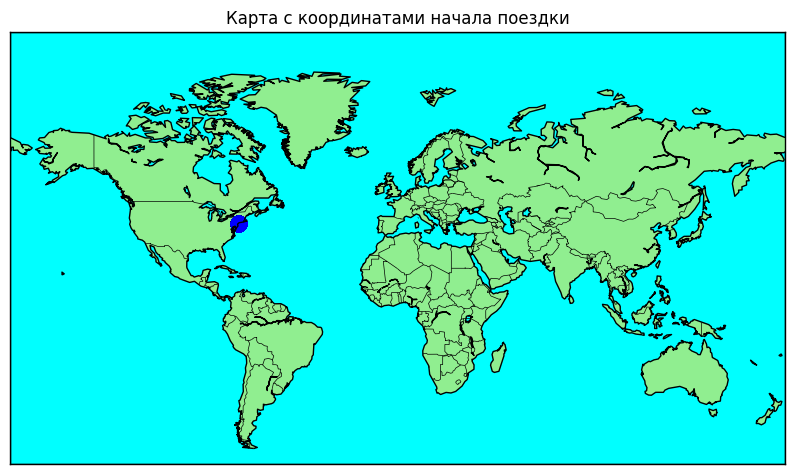

In [30]:
# Создаем фигуру и ось
plt.figure(figsize=(10, 7))

# Создаем объект Basemap с подходящей проекцией
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgreen', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Отображаем точки на карте
m.scatter(x_dropoff, y_dropoff, marker='o', color='blue', s=100)

# Отображаем график
plt.title('Карта с координатами конца поездки')
plt.show()

Удалим записи, где цена отрицательна

In [31]:
df.drop((df[df['fare_amount'] <= 0]).index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [32]:
df[df['fare_amount'] < 0].shape[0]

0

Посмотрим на поездки, которые стоили меньше 1 доллара

In [33]:
df[df['fare_amount'] <= 1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
20873,0.01,2015-05-31 16:13:41 UTC,-73.991692,40.770802,-73.991692,40.770824,1,0.002542
143647,0.11,2010-03-07 19:11:43 UTC,-73.997221,40.721345,-73.997252,40.721344,1,0.002621
183960,0.01,2010-03-08 18:44:57 UTC,-74.000523,40.725868,-73.956960,40.780855,1,7.128817


Явно выделяются дальние поездки, которые должны были стоит дороже  
Удалим их

In [34]:
df.drop((df[(df['fare_amount'] < 1) & (df['distance'] > 1)]).index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [35]:
df[df['fare_amount'] <= 1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
20873,0.01,2015-05-31 16:13:41 UTC,-73.991692,40.770802,-73.991692,40.770824,1,0.002542
143647,0.11,2010-03-07 19:11:43 UTC,-73.997221,40.721345,-73.997252,40.721344,1,0.002621


Взглянем, есть ли неоправданно дорогие поездки

In [36]:
df[(df['fare_amount'] > 50) & (df['distance'] < 1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
1974,113.66,2014-11-01 08:42:39 UTC,-73.951227,40.778753,-73.949938,40.778149,1,0.127824
9105,71.50,2014-03-29 13:43:00 UTC,-74.007065,40.716027,-74.006197,40.715617,2,0.086325
14799,120.30,2011-06-02 15:17:13 UTC,-73.995309,40.769470,-73.988705,40.768919,2,0.560910
15135,58.00,2011-10-14 23:59:00 UTC,-74.024880,40.754187,-74.024880,40.754182,1,0.000555
15272,58.57,2010-07-14 08:43:00 UTC,-73.801275,40.646348,-73.800873,40.646028,1,0.049182
...,...,...,...,...,...,...,...,...
176125,52.00,2014-04-17 15:14:17 UTC,-73.979453,40.754927,-73.981572,40.750832,2,0.488688
190372,52.00,2013-09-25 08:12:00 UTC,-73.954757,40.777497,-73.954693,40.778197,2,0.077922
190595,67.70,2011-06-23 23:19:00 UTC,-73.999995,40.761425,-74.001115,40.761960,5,0.111683
191114,52.00,2014-08-31 20:02:06 UTC,-73.789883,40.647023,-73.789882,40.647023,1,0.000085


Удалим эти записи об этих поездках

In [37]:
df.drop((df[(df['fare_amount'] > 50) & (df['distance'] < 1)]).index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [38]:
df[(df['fare_amount'] > 50) & (df['distance'] < 1)].shape[0]

0

Посмотрим, есть ли непоравданно дешёвые поездки

In [39]:
df[df['fare_amount'] < 1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
20864,0.01,2015-05-31 16:13:41 UTC,-73.991692,40.770802,-73.991692,40.770824,1,0.002542
143589,0.11,2010-03-07 19:11:43 UTC,-73.997221,40.721345,-73.997252,40.721344,1,0.002621


Таких нет

In [40]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,192327.000000,192327.000000,192327.000000,192327.000000,192327.000000,192327.000000,192327.000000
mean,11.127941,-73.975858,40.750934,-73.974759,40.751240,1.684511,3.293232
std,8.964056,0.033361,0.026131,0.032146,0.029526,1.388771,3.455028
min,0.010000,-74.025967,40.641026,-74.177362,40.607908,0.000000,0.000084
25%,6.000000,-73.992278,40.736594,-73.991580,40.735592,1.000000,1.280874
50%,8.500000,-73.982162,40.753338,-73.980614,40.753800,1.000000,2.173611
75%,12.500000,-73.968630,40.767498,-73.965803,40.768295,2.000000,3.902120
max,220.000000,-73.715078,40.841485,-73.755680,40.880425,208.000000,33.332688


Добавим новый столбец для того, чтобы можно было провести больше качественного анализа

In [41]:
def getPerKM(row):
    result = row['distance']/row['fare_amount']
    return result
    
df['fare_amount_per_km'] = df.apply(getPerKM, axis=1)

In [42]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,fare_amount_per_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,0.224148
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,0.318748
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,0.390667
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,0.313480
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,0.280233
...,...,...,...,...,...,...,...,...,...
192322,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112128,0.037376
192323,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.879635,0.250618
192324,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.867916,0.416437
192325,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.536552,0.243900


In [43]:
df.drop((df[df['distance'] > 1000]).index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

Теперь преобразуем столбец со временем  
Переведём его из типа данных object в datetime64

In [44]:
df['pickup_datetime'] = df['pickup_datetime'].astype('datetime64[ns, UTC]')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192327 entries, 0 to 192326
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         192327 non-null  float64            
 1   pickup_datetime     192327 non-null  datetime64[ns, UTC]
 2   pickup_longitude    192327 non-null  float64            
 3   pickup_latitude     192327 non-null  float64            
 4   dropoff_longitude   192327 non-null  float64            
 5   dropoff_latitude    192327 non-null  float64            
 6   passenger_count     192327 non-null  int64              
 7   distance            192327 non-null  float64            
 8   fare_amount_per_km  192327 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 13.2 MB


Раскидаем данные о времени по разным столбцам

In [46]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,fare_amount_per_km,year,month,day,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,0.224148,2015,5,7,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,0.318748,2009,7,17,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,0.390667,2009,8,24,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,0.313480,2009,6,26,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,0.280233,2014,8,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192322,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112128,0.037376,2012,10,28,10
192323,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.879635,0.250618,2014,3,14,1
192324,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.867916,0.416437,2009,6,29,0
192325,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.536552,0.243900,2015,5,20,14


Удалим признак pickup_datetime, т.к. он теперь не нужен

In [47]:
del df['pickup_datetime']

Добавим в датасет период суток, когда была поездка, чтобы потом посмотреть, как этот признак будет влиять на другие

In [48]:
def get_dayperiod(hour):
    if hour > 5 and hour < 12:
        return "morning"
    elif hour >= 12 and hour < 17:
        return "afternoon"
    elif hour >= 17 and hour < 22:
        return "evening"
    else: # 22 -> 5
        return "night"
    
df['pickup_period'] = df['hour'].apply(get_dayperiod)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,fare_amount_per_km,year,month,day,hour,pickup_period
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,0.224148,2015,5,7,19,evening
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,0.318748,2009,7,17,20,evening
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,0.390667,2009,8,24,21,evening
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,0.313480,2009,6,26,8,morning
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,0.280233,2014,8,28,17,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192322,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112128,0.037376,2012,10,28,10,morning
192323,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.879635,0.250618,2014,3,14,1,night
192324,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12.867916,0.416437,2009,6,29,0,night
192325,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.536552,0.243900,2015,5,20,14,afternoon


Заранее закодируем эти данные

In [49]:
le = LabelEncoder()

In [50]:
df['pickup_period_encoded'] = le.fit_transform(df['pickup_period'])

Один столбец будем использовать для визуализации, а другой для анализа, где не подходят категориальные данные  
Перед обучениме моделей, естественно, столбец pickup_period будет удалён

In [51]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,fare_amount_per_km,year,month,day,hour,pickup_period,pickup_period_encoded
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,0.224148,2015,5,7,19,evening,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,0.318748,2009,7,17,20,evening,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,0.390667,2009,8,24,21,evening,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,0.313480,2009,6,26,8,morning,2
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,0.280233,2014,8,28,17,evening,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192322,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112128,0.037376,2012,10,28,10,morning,2
192323,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.879635,0.250618,2014,3,14,1,night,3
192324,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12.867916,0.416437,2009,6,29,0,night,3
192325,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.536552,0.243900,2015,5,20,14,afternoon,0


Предположим, что машина может вместить минимум 6 человек, всё, что больше будем считать за выбросы  
Посмотрим, есть ли выбросы в столбце passenger_count

In [52]:
df[df['passenger_count'] > 6]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,fare_amount_per_km,year,month,day,hour,pickup_period,pickup_period_encoded
108661,11.7,-73.937795,40.758498,-73.937835,40.758415,208,0.009816,0.000839,2010,12,28,8,morning,2


Раз такая запись одна, так ещё и пассажиров аж 208 человек, думаем, можно удалить данную запись

In [53]:
df.drop((df[df['passenger_count'] > 6]).index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [54]:
df[df['passenger_count'] > 6].shape[0]

0

Посмотрим на поездки без пассажиров

In [55]:
df[df['passenger_count'] == 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,fare_amount_per_km,year,month,day,hour,pickup_period,pickup_period_encoded
317,10.1,-74.013900,40.707800,-73.992300,40.749300,0,4.956630,0.490755,2011,8,5,7,morning,2
874,11.7,-73.981000,40.764600,-73.962900,40.778400,0,2.164157,0.184971,2011,9,6,12,afternoon,0
891,3.3,-73.979978,40.765821,-73.983894,40.766873,0,0.350666,0.106262,2012,3,26,18,evening,1
1924,15.7,-73.975285,40.750138,-73.974729,40.783151,0,3.666374,0.233527,2012,4,20,15,afternoon,0
2901,6.1,-73.977900,40.789100,-73.983700,40.773600,0,1.789545,0.293368,2012,1,7,19,evening,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189038,5.7,-73.981165,40.744772,-73.994190,40.743725,0,1.106213,0.194072,2011,4,14,18,evening,1
189251,3.3,-74.000760,40.757637,-74.004852,40.751947,0,0.720185,0.218238,2011,1,17,15,afternoon,0
191241,5.7,-73.980300,40.742800,-73.967900,40.755600,0,1.765539,0.309744,2011,9,20,19,evening,1
191270,12.1,-73.996700,40.737200,-74.008500,40.704000,0,3.819232,0.315639,2011,8,22,21,evening,1


Доля их мала, поэтому удалим их из датасета

In [56]:
df.drop((df[df['passenger_count'] == 0]).index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [57]:
df[df['passenger_count'] == 0].shape[0]

0

### Разведочный анализ данных

Построим график, где узнаем информацию о количестве поездках с разным количеством пассажиров

<Axes: xlabel='passenger_count', ylabel='count'>

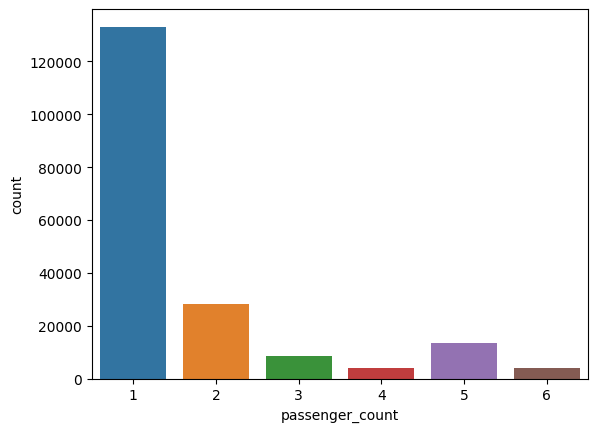

In [60]:
sns.countplot(x='passenger_count', data=df, palette = "tab10")

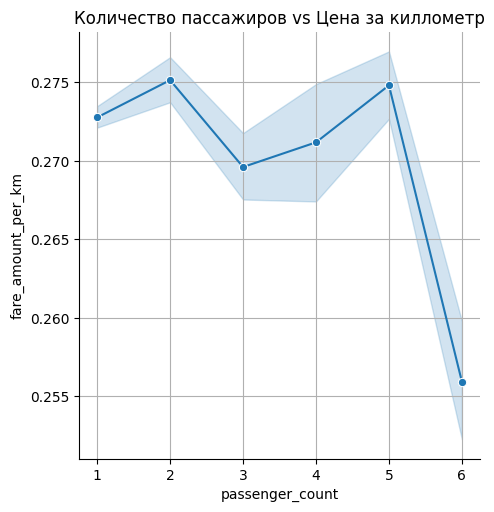

<Figure size 640x480 with 0 Axes>

In [100]:
sns.relplot(x='passenger_count',y='fare_amount_per_km', data = df, kind="line", marker = "o")

plt.grid(True)
plt.title('Количество пассажиров vs Цена за киллометр')
plt.show()
plt.tight_layout()

Больше всего ездит всего 1 пассажир  
Ещё выделяется тот момент, что 5 пассажиров встречается чаще, чем 3, 4 или 6

Расфасуем количество поездок по ценовым категориям и построим график

In [61]:
category = ["x < 50", "50 < x < 100", "x > 100"]
colmns = ["category", "count"]

df_count_fare_amount = pd.DataFrame(columns=colmns)

df_count_fare_amount["category"] = category
df_count_fare_amount

df_count_fare_amount["count"] = [df[df['fare_amount'] < 50].shape[0], 
               df[(df['fare_amount'] > 50) & (df['fare_amount'] < 100)].shape[0], 
              df[df['fare_amount'] > 100].shape[0]]

In [62]:
df_count_fare_amount

,category,count
0,x < 50,189651
1,50 < x < 100,1943
2,x > 100,16


189651
1943
16


<Axes: xlabel='Count', ylabel='category'>

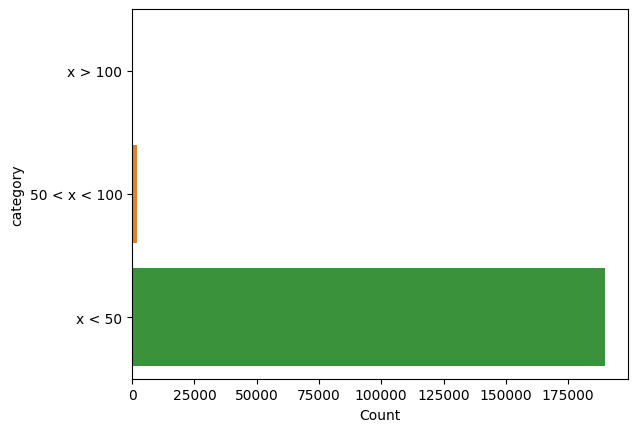

In [63]:
plt.xlabel('Count')

for value in df_count_fare_amount['count']:
    print(value)
    
sns.set_color_codes("muted")
sns.barplot(x='count', y='category', data=df_count_fare_amount.sort_values(by='count'), color="b", palette = "tab10")

Видно, что очень много поездок, которые стоили меньше 50 долларов  
Довольно мало поездок, которые стоили больше 100 долларов

Посмотрим динамику количества поездок в зависимости от года

<Axes: xlabel='year', ylabel='count'>

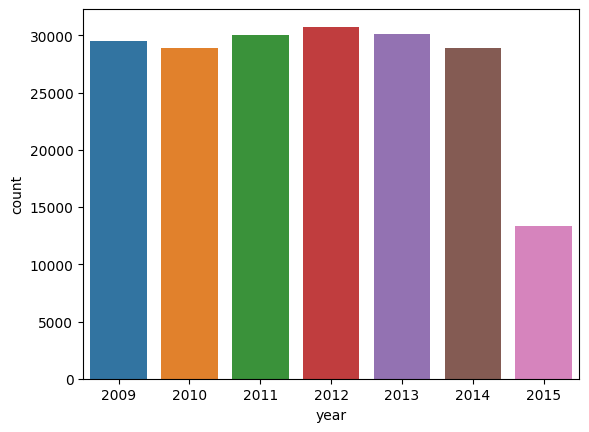

In [64]:
sns.countplot(x='year', data=df, palette = "tab10")

Больше всего люди сделали поездок в 2012 году  
Меньше всего - в 2015. Скорее всего это связано с тем, что данные собирались не до конца года

Посмотрим, когда чаще всего происходят поездки

<Axes: xlabel='pickup_period', ylabel='count'>

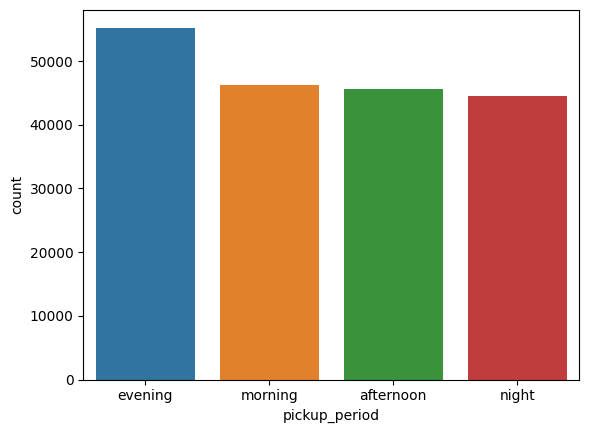

In [65]:
sns.countplot(x='pickup_period', data=df, palette = "tab10")

Чаще всего - вечером  
Связанно это скорее всего с тем, что люди уезжают домой с работы на такси

Посмотрим, как менялась цена поездки по годам

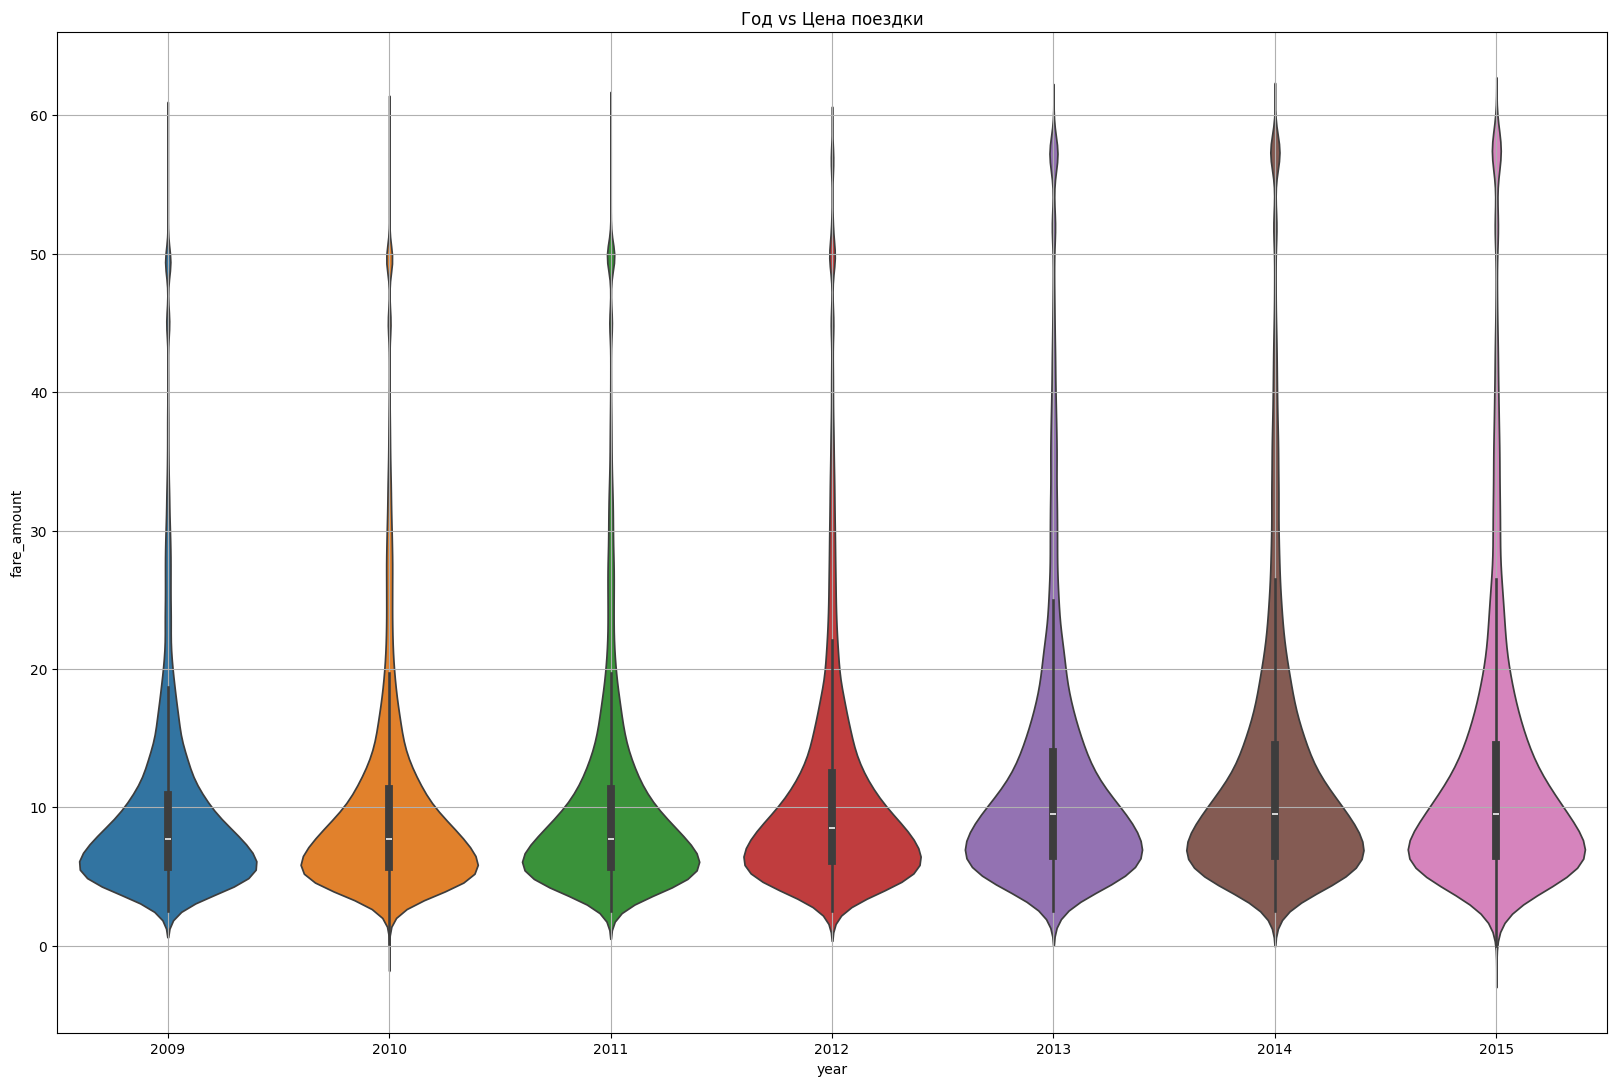

<Figure size 640x480 with 0 Axes>

In [66]:
plt.figure(figsize=(20, 13))
sns.violinplot(x = 'year', y = 'fare_amount', data = df[df['fare_amount'] < 60], palette = "tab10")
plt.grid()
plt.title('Год vs Цена поездки')
plt.show()
plt.tight_layout()

Средняя цена остаётся примерно такая же, однако дорогих поездок с каждым годом становилось всё больше

In [67]:
#average fare per year
avg = df.groupby(['year'], as_index = False)['fare_amount'].mean()

avg

,year,fare_amount
0,2009,9.817812
1,2010,9.975189
2,2011,10.216414
3,2012,11.008918
4,2013,12.413042
5,2014,12.707966
6,2015,12.625002


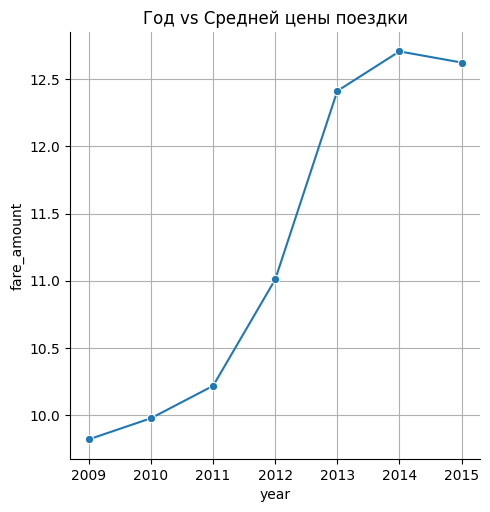

<Figure size 640x480 with 0 Axes>

In [68]:
sns.relplot(x='year',y='fare_amount', data = avg, kind="line", marker = "o")

plt.grid(True)
plt.title('Год vs Средней цены поездки')
plt.show()
plt.tight_layout()

Средняя цена поездки с годами значительно выросла

Посмотрим на нормальность распределения

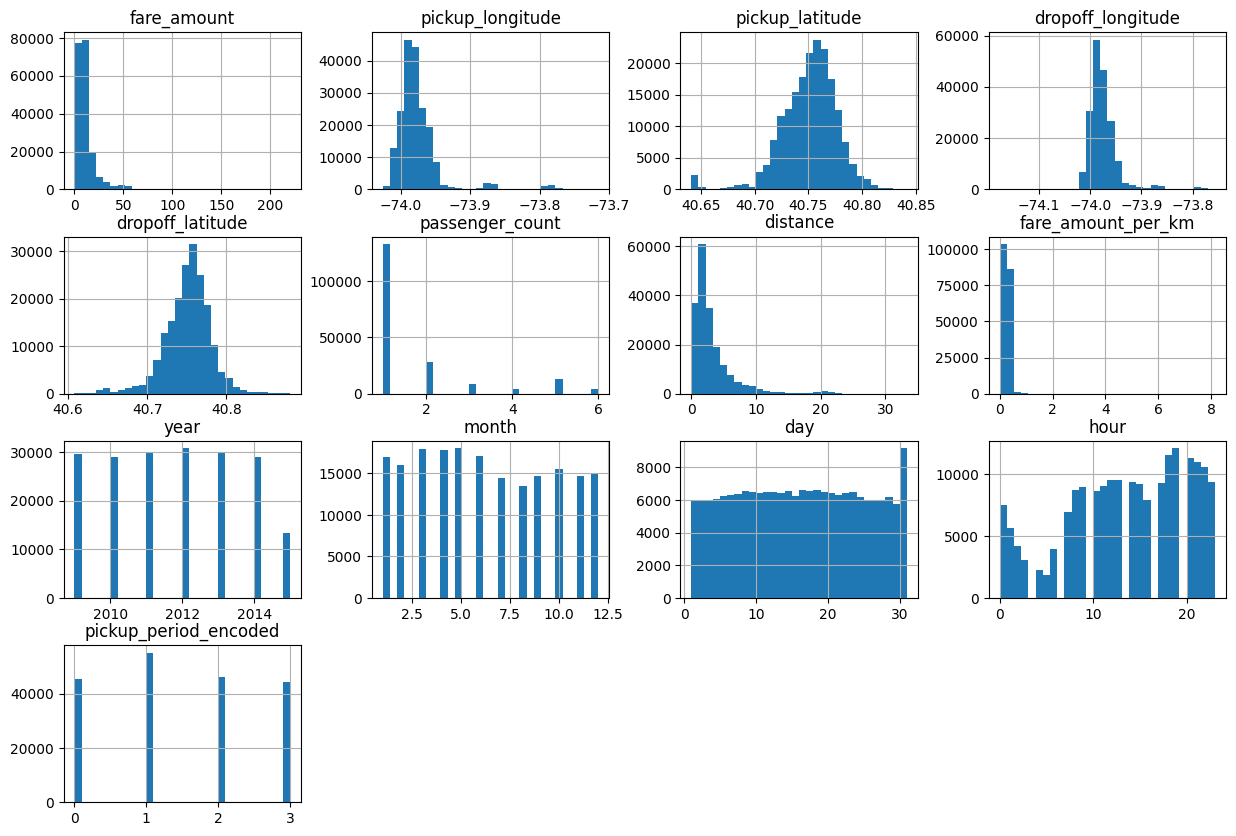

In [69]:
df.hist(figsize = (15,10), bins = 30);

Нормальное распределение замечено у признаков pickup_latitude, dropoff_longitude и dropoff_latitude

Взглянем на корреляционную карту

<Axes: >

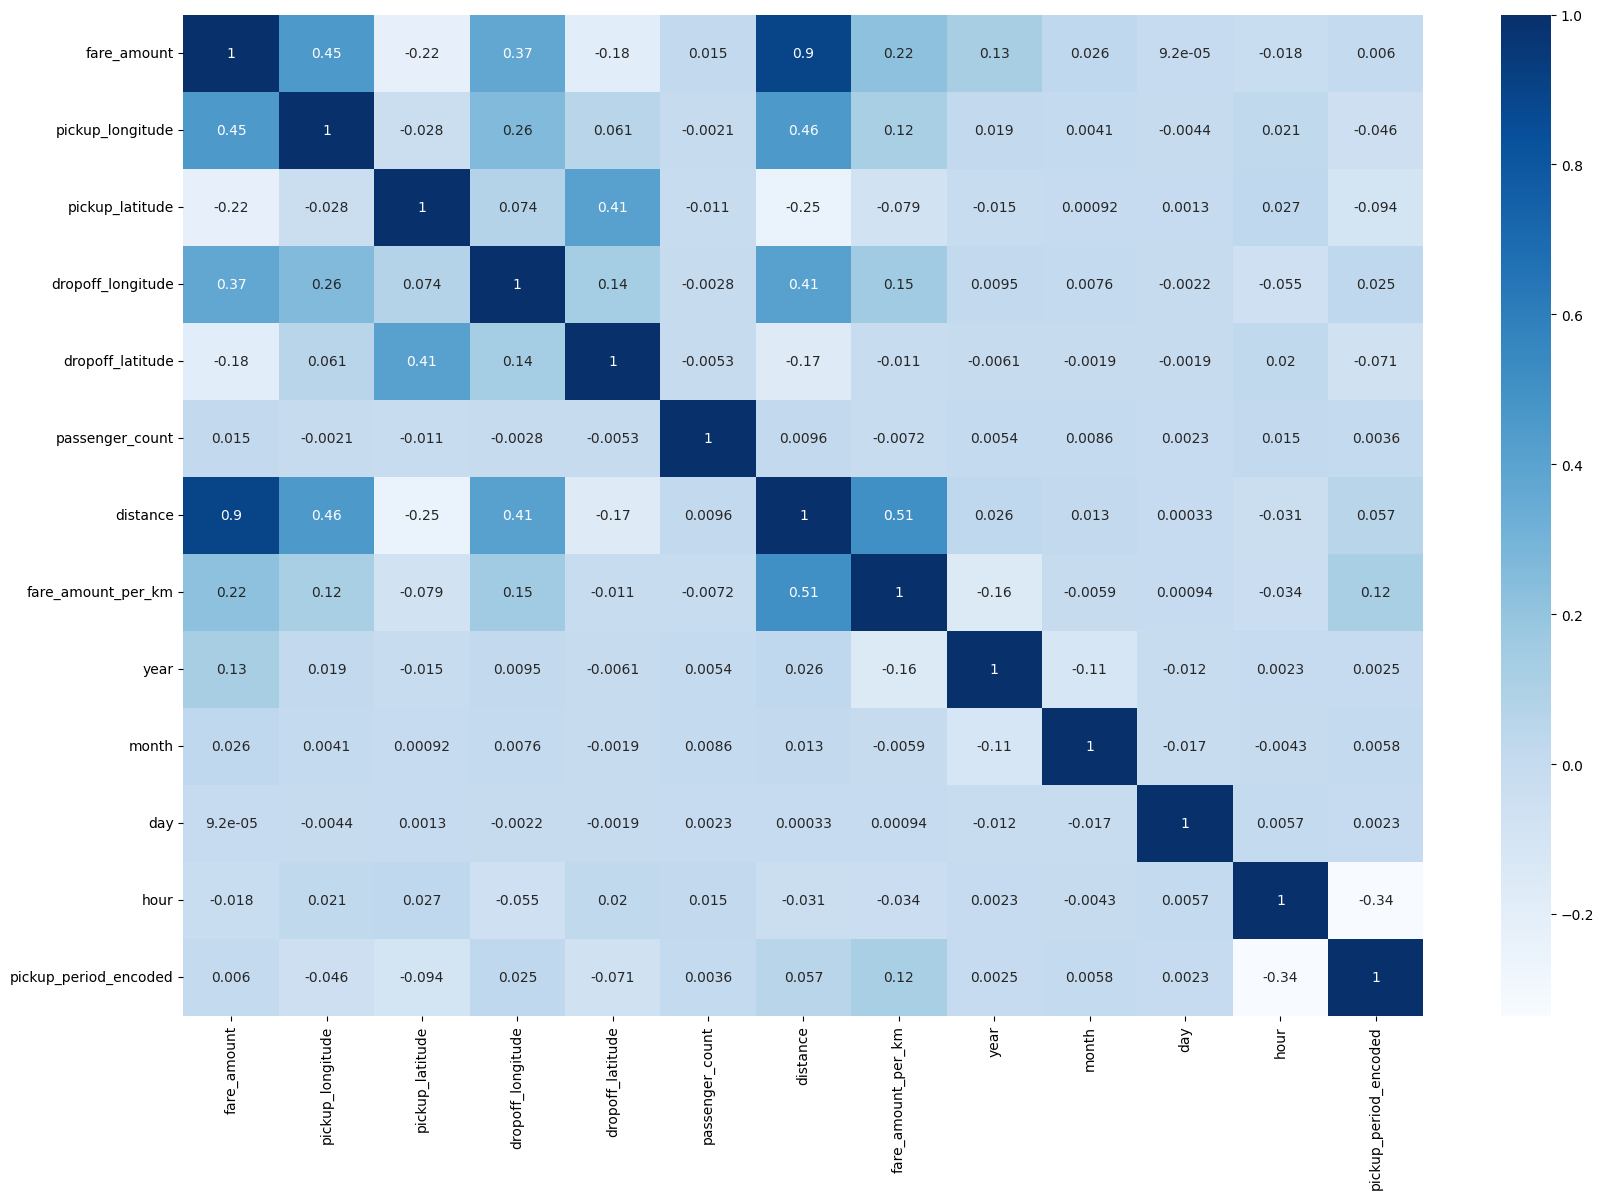

In [71]:
plt.figure(figsize=(20, 13))
sns.heatmap(df.drop('pickup_period', axis=1).corr(), annot=True, cmap='Blues')

Логично, что будет сильная корреляция между fare_amount и distance  
Также есть корреляция между fare_amount_per_km и distance  

Построим ящики с усами и посмотрим на потенциальные выбросы

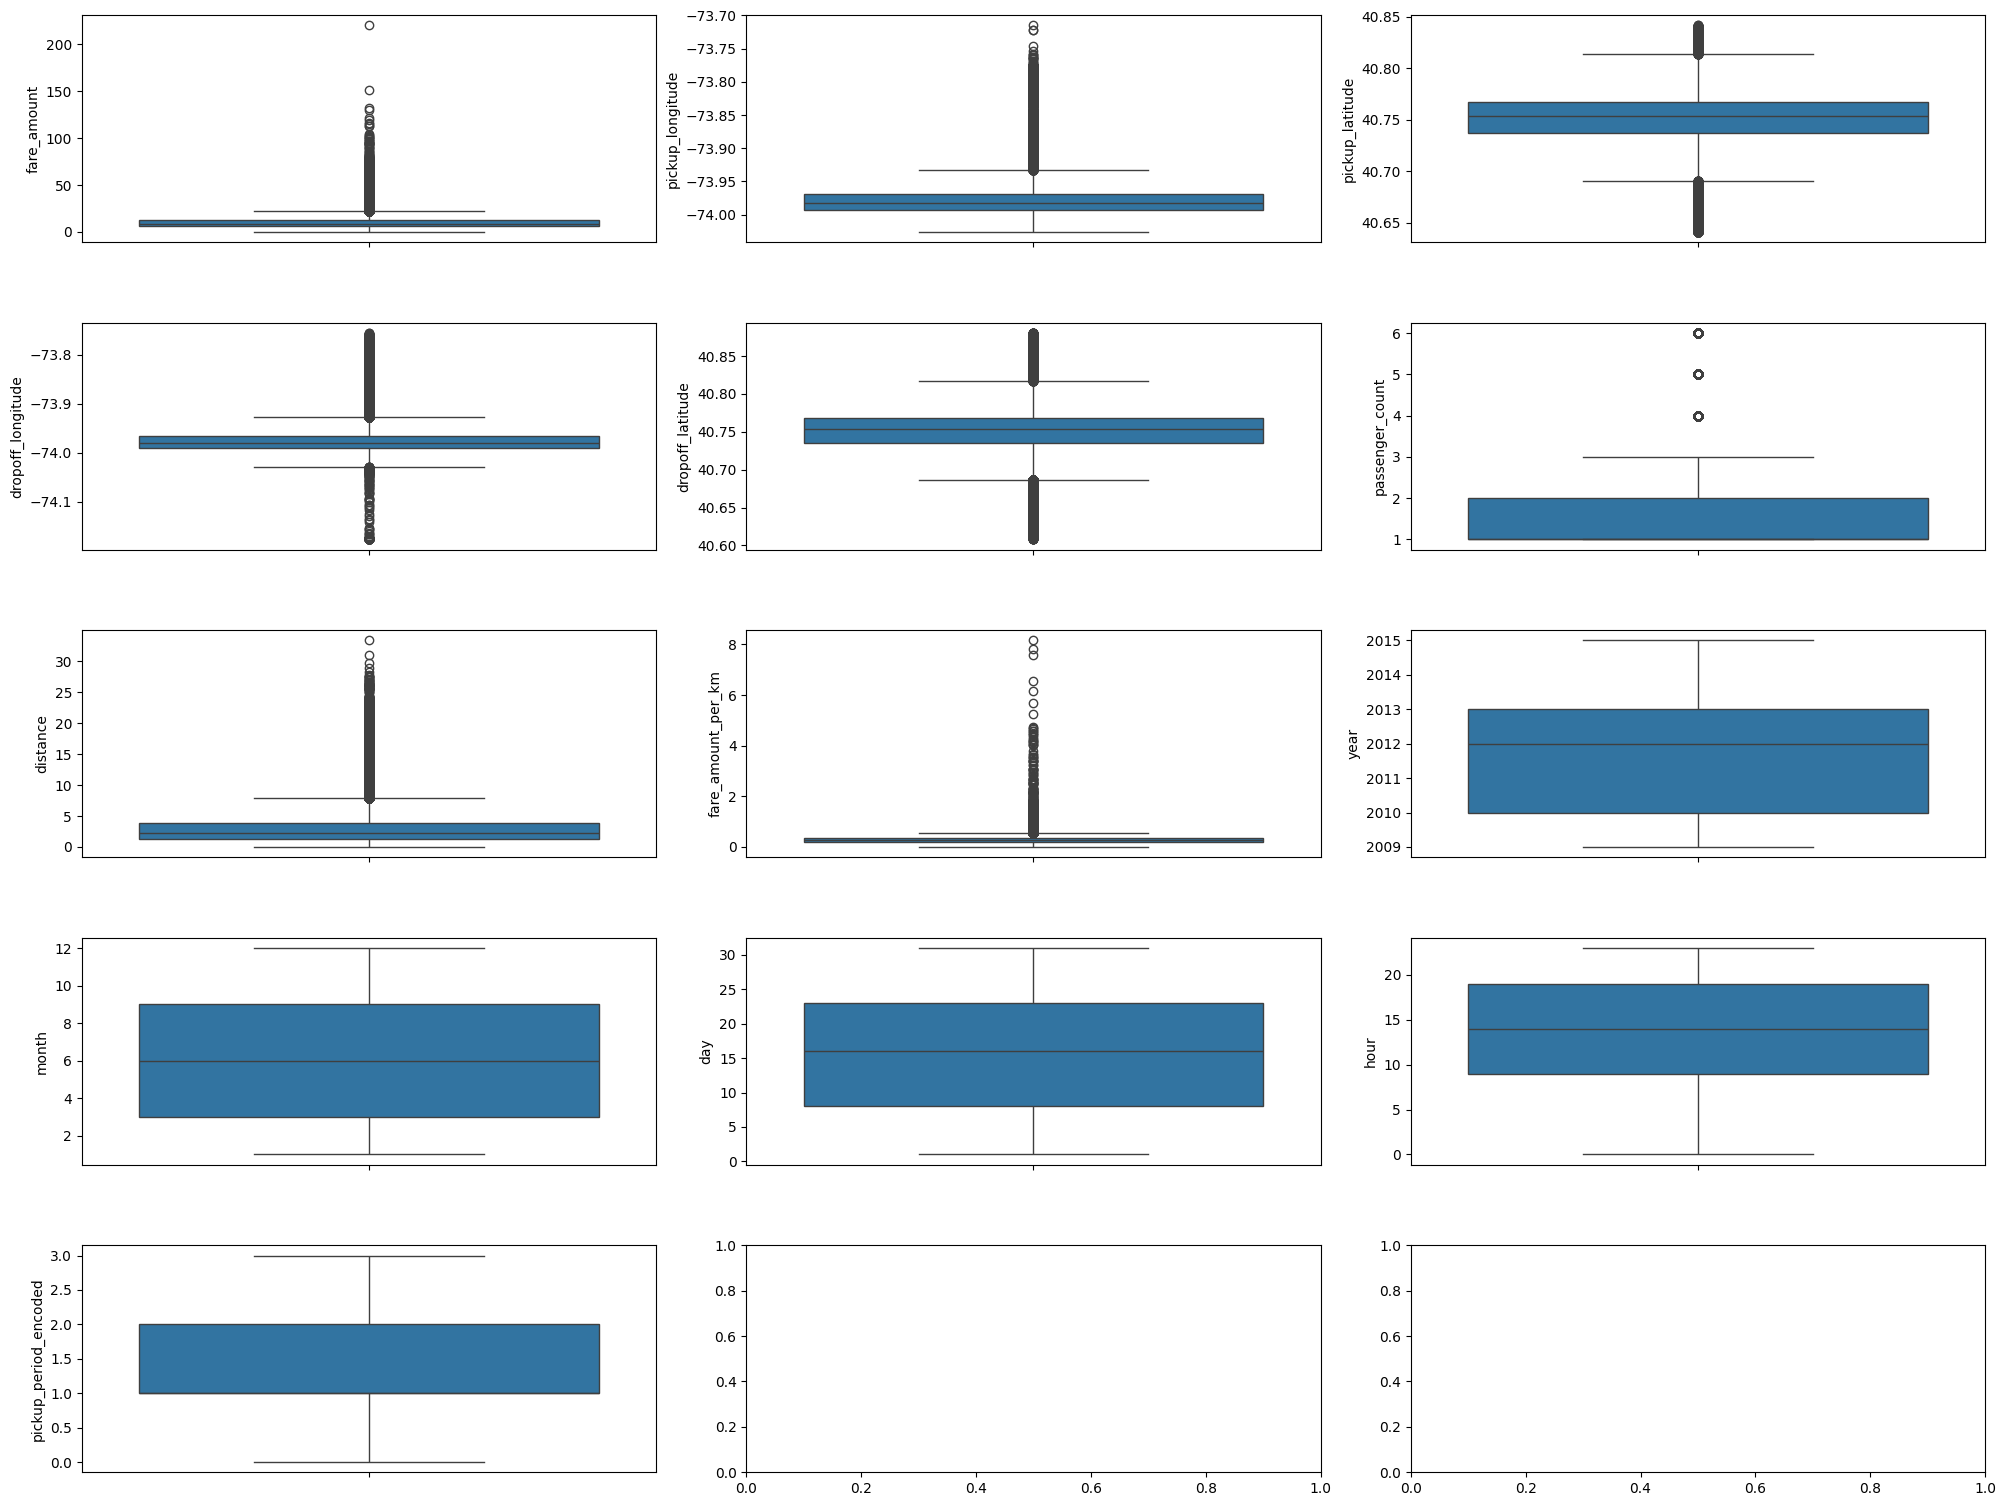

In [73]:
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(20,15))
index = 0
ax = ax.flatten()

for col, value in df.drop('pickup_period', axis=1).items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

plt.savefig("outliers_boxplot.png")

В целом выбросов нет, т.к. цена может быть как высокой так и низкой  
Что же про координаты, убер могли вызывать в разных частях мира

### Обучение моделей

#### Подготовка тренировочных и тестовых данных

Подключение необходимых для подготвки данных модулей

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Выделяем целевую переменную и признаки для обучения

In [75]:
Y = df['fare_amount']
X = df.drop(['fare_amount', 'pickup_period'],axis=1)

Разделяем данные на тестовые и тренировочные

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.3, random_state=41)

Стандартизируем данные

In [77]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Пишем функцию для обучения моделей, которая будет обучать модель на разных данных (обычных, нормализованных и стандартизованных) 
и будет выбирать лучший R2 score

#### Подключение библиотек для обучения и оценивания моделей

In [78]:
#Разичные модели
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#Метрики
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Модули для настройки гиперпараметров
from sklearn.model_selection import GridSearchCV
import optuna

Делаем словарь с моделями, чтобы затем перебрать их в цикле и обучить

In [79]:
models = {}

models['Linear Regression'] = LinearRegression()
models['KNeighbors Regression'] = KNeighborsRegressor()
models['GradientBoosting Regression'] = GradientBoostingRegressor()
models['XGBoost Regression'] = XGBRegressor()

Пишем цикл в котором модель будет обучаться, также в котором будет выводится результат обучения модели

-----------Linear Regression-------------
Mean Absolute Error: 1.4719155061805065
Mean Squared Error: 8.87001459454926
R2 score: 0.8906186726146281


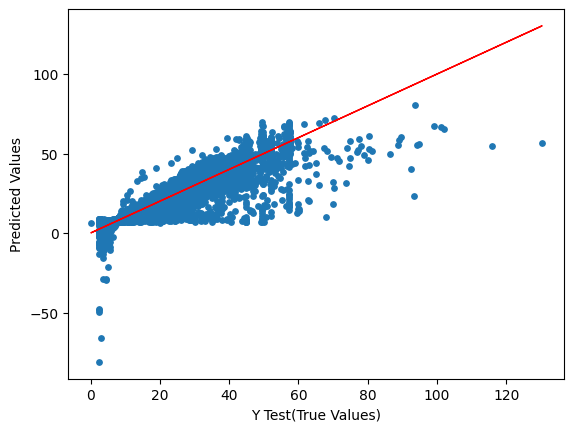

-----------KNeighbors Regression-------------
Mean Absolute Error: 1.8021907362635448
Mean Squared Error: 9.178262710938725
R2 score: 0.886817485167266


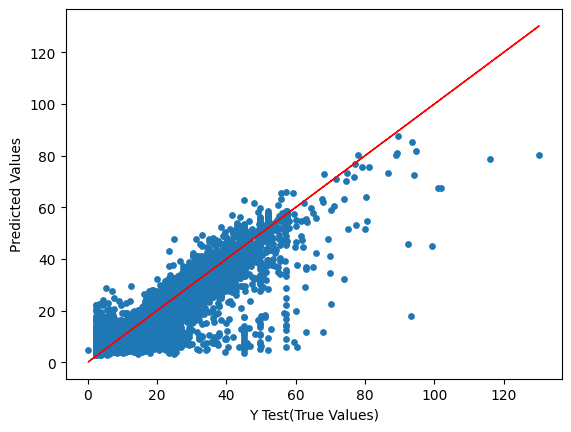

-----------GradientBoosting Regression-------------
Mean Absolute Error: 0.4051251468081228
Mean Squared Error: 0.7694031255282883
R2 score: 0.9905120409591598


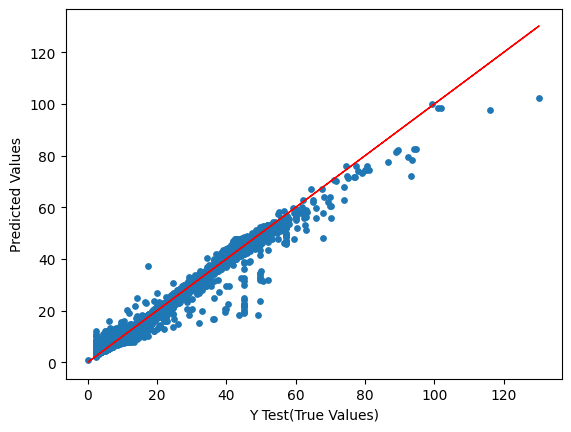

-----------XGBoost Regression-------------
Mean Absolute Error: 0.24700758053566163
Mean Squared Error: 1.2364464514969131
R2 score: 0.9847526570938481


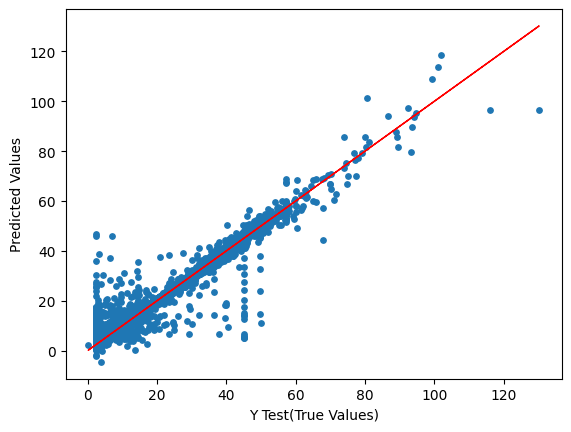

In [80]:
trained_models = {}
models_r2_scores = {}

for name, model in models.items():
  trained_model = model.fit(X_train_scaled, Y_train)
  trained_models[name] = trained_model
  y_pred = trained_model.predict(X_test_scaled)

  mae = mean_absolute_error(Y_test, y_pred)
  mse = mean_squared_error(Y_test, y_pred)
  r2 = r2_score(Y_test, y_pred) #multioutput='variance_weighted'
  models_r2_scores[name] = r2
    
  print("-----------"+name+"-------------")
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R2 score: {r2}")

  plt.scatter(Y_test, y_pred, s=15)
  plt.xlabel('Y Test(True Values)')
  plt.ylabel('Predicted Values')
  plt.plot(Y_test, Y_test, color='red', lw=1)

  plt.show()

In [98]:
model_names = ['Linear Regression', 
               'KNeighbors Regression', 
               'GradientBoosting Regression', 
               'XGBoost Regression']
r2_scores = [models_r2_scores['Linear Regression'], 
             models_r2_scores['KNeighbors Regression'], 
             models_r2_scores['GradientBoosting Regression'], 
             models_r2_scores['XGBoost Regression']]

log = pd.DataFrame({
    'Regressor': model_names,
    'R2': r2_scores
})

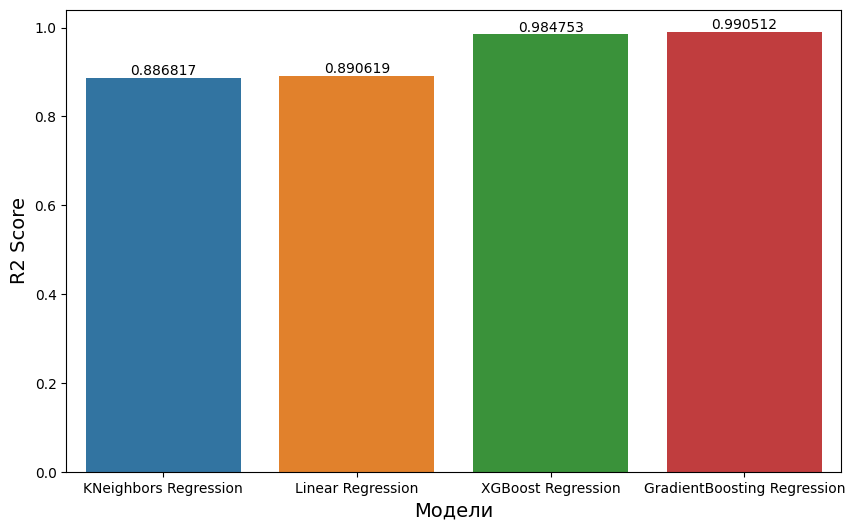

In [99]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='R2', x='Regressor', data=log.sort_values(by='R2'), palette = "tab10")

for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Модели', fontsize=14)
plt.ylabel('R2 Score', fontsize=14)
plt.show()

Обучив все модели, можно сделать вывод, что GradientBoosting Regression оказался лучшей моделью  
Но так как, XGBoost является усовершенственной версией градиентного бустинга и предотвращает переобучение, используя регуляризацию L1 и L2 и вообще работает кратно быстрей чем градиентный бустинг, настраивать гиперпараметры будем именно у него 

### Настройки гиперпараметров

Сначала пробуем GridSearchCV  
Напишем функцию, которая найдёт лучшие гиперпараметры и вернёт модель, обученную на них  

In [88]:
def tune_model(model, param_grid, X_train, y_train, scoring='r2', cv=5):
    grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=cv, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучший результат: {grid_search.best_score_}")
    
    return grid_search.best_estimator_

In [89]:
#best_xgb_model = tune_model(
#    trained_models['XGBoost Regression'],
#    param_grid_xgb,
#    X_train_scaled,
#    Y_train
#)

В нашем случае такой подход к настройке неэффективен, т.к. настрйока происходит долго и по итогу мы получаем модель хуже

Попробуем использовать модуль optuna для настройки гиперпараметров  
Также напишем функцию цели в которую будет передаваться объект trial  
Optuna будет автоматически вызывать эту функцию, передавая ей различные комбинации гиперпараметров для поиска оптимального решения

In [90]:
def objective(trial):
    # Словарь с гиперпараметрами, значения тут - это диапазон значений, созданный благодаря trial.suggest_*
    param = {"learning_rate": trial.suggest_uniform('learning_rate', 0.05, 0.15),
                  "max_depth": trial.suggest_int('max_depth', 3, 8),
                  "min_child_weight": trial.suggest_int('min_child_weight', 1, 7),
                  "gamma": trial.suggest_uniform('gamma', 0.0, 0.2),
                  "colsample_bytree": trial.suggest_uniform('colsample_bytree', 0.1, 0.4),
                  "booster": trial.suggest_categorical('booster', ['gbtree', 'dart']), # Тип ускорителя
                  "tree_method": trial.suggest_categorical('tree_method', ['auto', 'exact']),} # Метод дерева 

    model = XGBRegressor(**param)

    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    return r2_score(Y_test, predictions)

Создаём объект study и указываем, что мы хотим максимизировать метрику  
Далее начинаем оптимизацию  

In [91]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-12-01 21:24:01,138] A new study created in memory with name: no-name-22caf147-210a-4030-bc49-5ca9f4c80717
[I 2024-12-01 21:24:44,218] Trial 0 finished with value: 0.861023237518405 and parameters: {'learning_rate': 0.09395734520367033, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.0819136838815882, 'colsample_bytree': 0.19505978263323062, 'booster': 'dart', 'tree_method': 'auto'}. Best is trial 0 with value: 0.861023237518405.
[I 2024-12-01 21:25:26,178] Trial 1 finished with value: 0.9641256658996942 and parameters: {'learning_rate': 0.14319085411069232, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.19865355798642803, 'colsample_bytree': 0.300490843541823, 'booster': 'dart', 'tree_method': 'auto'}. Best is trial 1 with value: 0.9641256658996942.
[I 2024-12-01 21:25:26,610] Trial 2 finished with value: 0.9575773089105304 and parameters: {'learning_rate': 0.14149378294763354, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 0.03698571180185015, 'colsample_bytree': 0.27607

Далее получаем лучшие параметры, обучаем модель по ним и выводим R2 score

In [92]:
print("Лучшие гиперпараметры: ", study.best_params)

best_params = study.best_params
best_model = XGBRegressor(**best_params)

best_model.fit(X_train_scaled, Y_train)

predictions = best_model.predict(X_test_scaled)
r2 = r2_score(Y_test, predictions)
print(f"R2 score с новыми гиперпараметрами: {r2}")

Лучшие гиперпараметры:  {'learning_rate': 0.14951162099353815, 'max_depth': 7, 'min_child_weight': 7, 'gamma': 0.004013830960969931, 'colsample_bytree': 0.3566349708667816, 'booster': 'gbtree', 'tree_method': 'exact'}
R2 score с новыми гиперпараметрами: 0.9828464606611181


In [93]:
model_names = ['XGBoost Regression New', 
               'XGBoost Regression Old']

r2_scores = [r2, 
             models_r2_scores['XGBoost Regression']]

log = pd.DataFrame({
    'Regressor': model_names,
    'R2': r2_scores
})

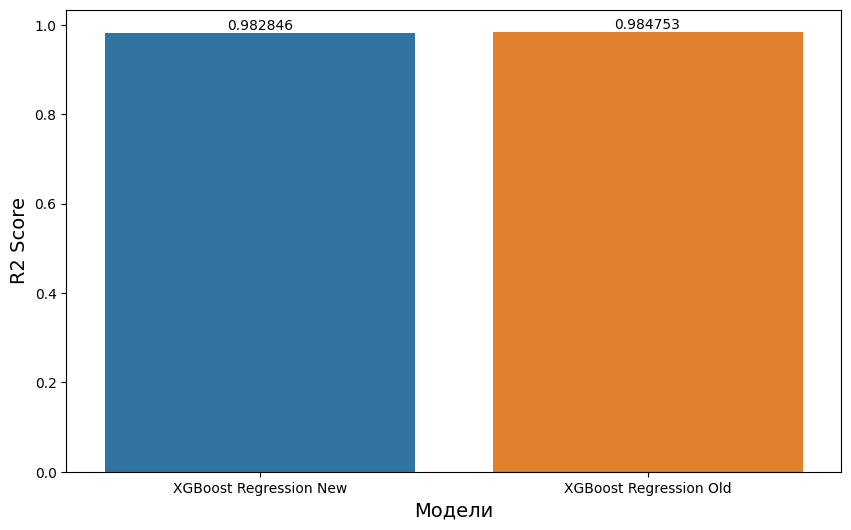

In [96]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='R2', x='Regressor', data=log.sort_values(by='R2'), palette = "tab10")

for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Модели', fontsize=14)
plt.ylabel('R2 Score', fontsize=14)
plt.show()

Модель стала чуть похуже

### Вывод
Провели разведочный анализ и предобработку данных, выяснили что в датасете были пропущенные значения, не было дубликатов.  
Были обнаружены и успешно обработаны выбросы.  
Было добавлено несколько дополнительных признаков для более качественного анализа и обучения моделей.

Были замечены признаки, которые коррелируют между собой.  
Также некоторые признаки имеют нормальное распределение.  

Провели обучение 4-х моделей:
- Linear Regressor
- KNeighbors Regressor 
- GradientBoosting Regressor
- XGBoost Regressor

После сравнения стало ясно, что моделью с лучшими метриками является GradientBoosting Regressor, но для настройки гиперпараметров был выбран XGBoost Regressor

Проведя настройку гиперпараметров модели, её точность предсказания ухудшилась